In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
pd. set_option("display.max_columns", 24)

In [3]:
df=pd.read_csv('MLB_train.csv')
df.head(10)

,date,season,neutral,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,rating1_pre,rating2_pre,pitcher1,pitcher2,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score
0,6/22/1994,1994,0,STL,WSN,1477.133,1539.099,0.445579,0.554421,1475.581,1540.652,1479.239,1540.571,tewkb001,ruetk001,47.695,47.625,0.252007,-1.356784,0.446481,0.553519,1477.558,1542.252,4
1,4/19/1927,1927,0,MIN,OAK,1527.281,1528.212,0.533150,0.466850,1525.293,1530.201,1525.940,1529.617,crowg102,ehmkh101,48.558,55.427,-0.235047,0.334327,0.529214,0.470786,1524.106,1531.450,1
2,5/7/1925,1925,0,BAL,DET,1475.489,1511.420,0.482837,0.517163,1476.912,1509.997,1473.893,1513.352,david102,white102,48.801,48.448,-0.010332,-0.072218,0.477767,0.522233,1475.288,1511.956,6
3,8/6/1911,1911,0,STL,ATL,1503.699,1383.671,0.696163,0.303837,1499.664,1387.705,1503.849,1380.447,woodg103,browb102,47.400,45.297,NaN,NaN,0.700255,0.299745,1500.029,1384.267,1
4,5/6/2000,2000,0,TOR,CLE,1506.707,1527.706,0.504319,0.495681,1505.018,1529.395,1509.062,1527.201,carpc002,wrigj002,50.836,50.042,-0.208619,-0.345692,0.508434,0.491566,1507.290,1528.973,6
5,1891-09-25,1891,0,CHC,PIT,1572.401,1470.963,0.673065,0.326935,1571.886,1471.478,1572.381,1470.969,galvj103,gumba101,NaN,NaN,NaN,NaN,0.673032,0.326968,1571.867,1471.483,4
6,4/19/1963,1963,0,LAD,HOU,1519.954,1455.662,0.624396,0.375604,1521.327,1454.289,1518.137,1457.756,koufs101,farrt101,57.695,54.412,-0.351777,-1.538962,0.622048,0.377952,1519.522,1456.370,2
7,8/14/1983,1983,0,BOS,KCR,1500.980,1495.464,0.542375,0.457625,1498.533,1497.911,1502.988,1496.168,tudoj001,creek001,53.008,42.703,-0.889592,-0.247801,0.544238,0.455762,1500.118,1499.038,3
8,7/23/1995,1995,0,KCR,BAL,1496.664,1523.699,0.495632,0.504368,1494.215,1526.148,1496.206,1521.612,gordt001,mussm001,54.310,55.018,-0.247801,-0.010332,0.497977,0.502023,1493.810,1524.008,2
9,7/4/1918,1918,0,CLE,BAL,1526.263,1478.984,0.601163,0.398837,1527.678,1477.569,1521.864,1481.093,coves101,wrigr104,58.597,47.560,-0.345692,-0.010332,0.592148,0.407852,1523.066,1479.891,4


In [4]:
## dataset shape 

print(f"{'shape of the dataset'.title()} :- {df.shape}")

## missing values
print(f"\n {'Number of null values in every column'.title()} \n {df.isnull().sum()}")

## duplicate values
print(f"\n {'number of duplicate values'.title()} :- {len(df.loc[df.duplicated()])}")

## information about dataset
print(f"{'dataset info'.title()} \n ")
df.info()

Shape Of The Dataset :- (176040, 24)

 Number Of Null Values In Every Column 
 date                0
season              0
neutral             0
team1               0
team2               0
elo1_pre            0
elo2_pre            0
elo_prob1           0
elo_prob2           0
elo1_post           0
elo2_post           0
rating1_pre         0
rating2_pre         0
pitcher1           31
pitcher2           31
pitcher1_rgs    26890
pitcher2_rgs    26890
pitcher1_adj    27439
pitcher2_adj    27439
rating_prob1        0
rating_prob2        0
rating1_post        0
rating2_post        0
score               0
dtype: int64

 Number Of Duplicate Values :- 0
Dataset Info 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176040 entries, 0 to 176039
Data columns (total 24 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date          176040 non-null  object 
 1   season        176040 non-null  int64  
 2   neutral       176040 non-null  int64  

In [5]:
for column in df[['score','season','team1','team2','pitcher1','pitcher2','neutral']]:
    print(str(column)+':'+str(df[column].unique()))
    print(df[column].value_counts())
    print('************************************************************************************************************')
    print('\n')

score:[ 4  1  6  2  3  7 10  5  0  8 11  9 12 15 13 14 18 19 17 20 16 21 24 28
 25 22 23 29 26 32 35 30 27 31 37]
3     24393
4     23010
2     22467
5     20207
1     17264
6     16318
7     12430
0      9998
8      9140
9      6441
10     4556
11     3209
12     2154
13     1493
14      989
15      627
16      431
17      291
18      215
19      110
20       96
21       58
23       32
22       30
24       18
25       18
26       13
27        8
28        6
29        5
30        5
32        3
31        2
35        2
37        1
Name: score, dtype: int64
************************************************************************************************************


season:[1994 1927 1925 1911 2000 1891 1963 1983 1995 1918 1978 2010 2015 1980
 1998 1959 1990 1942 1929 1916 1973 1922 1958 1937 1955 1939 1997 2007
 1906 1967 1921 1931 1982 1968 2009 1988 1919 1896 2005 1985 2003 1974
 2019 1924 2018 2017 1928 1965 1979 1903 1897 2008 1943 1992 1975 1936
 1960 1956 1977 1888 1950 1964 1933 19

In [6]:
df.drop(columns=['date'],inplace=True,axis=1)

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df[['team1','team2','pitcher1','pitcher2']]:
    df[col]=le.fit_transform(df[col])

In [8]:
#from sklearn.impute import KNNImputer
#imputer=KNNImputer(missing_values=np.NAN,n_neighbors=3)
#lst=['pitcher1_rgs','pitcher2_rgs','pitcher1_adj','pitcher2_adj']
#for i in lst:
#    df[i]=imputer.fit_transform(df[i].values.reshape(-1,1))
#    df[i]=pd.DataFrame(df[i])

In [9]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(random_state=42)
df[['pitcher1_rgs','pitcher2_rgs','pitcher1_adj','pitcher2_adj','pitcher1','pitcher2']]=imputer.fit_transform(df[['pitcher1_rgs','pitcher2_rgs','pitcher1_adj','pitcher2_adj','pitcher1','pitcher2']])

In [10]:
df.head(10)

,season,neutral,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,rating1_pre,rating2_pre,pitcher1,pitcher2,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score
0,1994,0,72,88,1477.133,1539.099,0.445579,0.554421,1475.581,1540.652,1479.239,1540.571,5215.0,4659.0,47.69500,47.625000,0.252007,-1.356784,0.446481,0.553519,1477.558,1542.252,4
1,1927,0,44,52,1527.281,1528.212,0.533150,0.466850,1525.293,1530.201,1525.940,1529.617,1691.0,2011.0,48.55800,55.427000,-0.235047,0.334327,0.529214,0.470786,1524.106,1531.450,1
2,1925,0,3,25,1475.489,1511.420,0.482837,0.517163,1476.912,1509.997,1473.893,1513.352,1760.0,5537.0,48.80100,48.448000,-0.010332,-0.072218,0.477767,0.522233,1475.288,1511.956,6
3,1911,0,72,2,1503.699,1383.671,0.696163,0.303837,1499.664,1387.705,1503.849,1380.447,5667.0,1261.0,47.40000,45.297000,-2.373072,-2.494741,0.700255,0.299745,1500.029,1384.267,1
4,2000,0,77,21,1506.707,1527.706,0.504319,0.495681,1505.018,1529.395,1509.062,1527.201,1415.0,5690.0,50.83600,50.042000,-0.208619,-0.345692,0.508434,0.491566,1507.290,1528.973,6
5,1891,0,13,59,1572.401,1470.963,0.673065,0.326935,1571.886,1471.478,1572.381,1470.969,2279.0,2506.0,50.37451,50.354675,0.555698,0.569571,0.673032,0.326968,1571.867,1471.483,4
6,1963,0,39,30,1519.954,1455.662,0.624396,0.375604,1521.327,1454.289,1518.137,1457.756,3199.0,2097.0,57.69500,54.412000,-0.351777,-1.538962,0.622048,0.377952,1519.522,1456.370,2
7,1983,0,8,37,1500.980,1495.464,0.542375,0.457625,1498.533,1497.911,1502.988,1496.168,5311.0,1697.0,53.00800,42.703000,-0.889592,-0.247801,0.544238,0.455762,1500.118,1499.038,3
8,1995,0,37,3,1496.664,1523.699,0.495632,0.504368,1494.215,1526.148,1496.206,1521.612,2405.0,3962.0,54.31000,55.018000,-0.247801,-0.010332,0.497977,0.502023,1493.810,1524.008,2
9,1918,0,21,3,1526.263,1478.984,0.601163,0.398837,1527.678,1477.569,1521.864,1481.093,1649.0,5696.0,58.59700,47.560000,-0.345692,-0.010332,0.592148,0.407852,1523.066,1479.891,4


In [11]:
df.describe()

,season,neutral,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,rating1_pre,rating2_pre,pitcher1,pitcher2,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score
count,176040.000000,176040.000000,176040.000000,176040.000000,176040.000000,176040.000000,176040.000000,176040.000000,176040.000000,176040.000000,176040.000000,176040.000000,176040.000000,176040.000000,176040.000000,176040.000000,176040.000000,176040.000000,176040.000000,176040.000000,176040.000000,176040.000000,176040.000000
mean,1962.222347,0.000153,37.551954,37.571143,1503.812569,1503.433018,0.534251,0.465749,1503.786940,1503.458648,1503.811866,1503.435349,2890.758958,2897.786725,50.335844,50.316408,0.293209,0.335197,0.534850,0.465150,1503.782671,1503.464543,4.648529
std,40.001724,0.012384,24.828642,24.830182,37.933547,38.114510,0.077488,0.077488,38.022984,38.218555,38.181808,38.363922,1681.902608,1677.494376,3.852335,3.851816,6.739373,6.687713,0.078943,0.078943,38.269437,38.468247,3.283705
min,1871.000000,0.000000,0.000000,0.000000,1347.367000,1336.761000,0.206134,0.177449,1346.220000,1334.931000,1347.527000,1336.836000,0.000000,0.000000,35.440444,36.464637,-60.749042,-66.755793,0.203695,0.177482,1346.381000,1335.004000,0.000000
25%,1929.000000,0.000000,14.000000,14.000000,1479.023000,1478.758500,0.483013,0.413178,1478.878750,1478.701750,1479.007750,1478.717750,1409.000000,1428.000000,47.740000,47.731000,-0.351777,-0.351777,0.482464,0.411619,1478.895750,1478.706750,2.000000
50%,1970.000000,0.000000,39.000000,39.000000,1505.720500,1505.327000,0.535147,0.464853,1505.680000,1505.384500,1505.802500,1505.435500,2919.000000,2929.000000,50.233770,50.194829,-0.072218,-0.072218,0.535867,0.464133,1505.781000,1505.489500,4.000000
75%,1997.000000,0.000000,59.000000,59.000000,1529.681250,1529.311500,0.586822,0.516987,1529.754000,1529.404000,1529.608250,1529.299000,4359.000000,4356.000000,52.179000,52.160118,0.252007,0.252007,0.588381,0.517536,1529.627250,1529.405250,6.000000
max,2020.000000,1.000000,88.000000,88.000000,1656.119000,1657.618000,0.822551,0.793866,1656.798000,1657.986000,1657.500000,1658.985000,5762.000000,5755.000000,77.481000,78.047000,76.298680,79.396249,0.822518,0.796305,1658.171000,1659.344000,37.000000


Text(0.5, 1.0, 'feature correlation with target variable - Score')

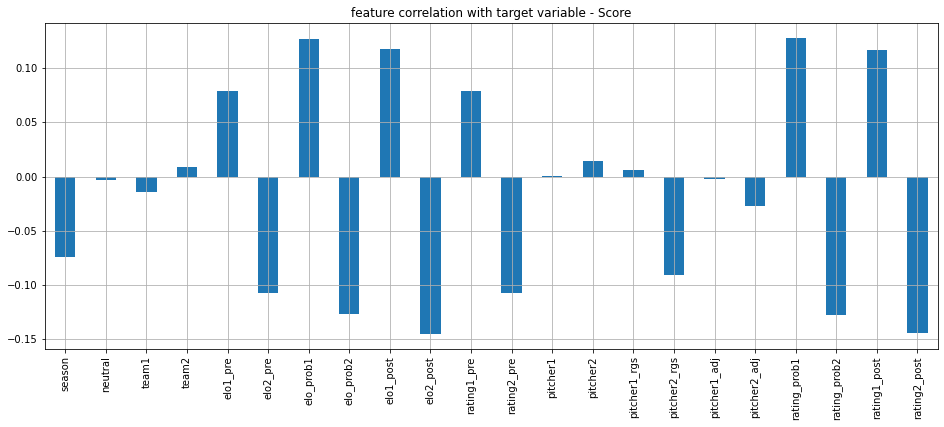

In [12]:
plt.figure(figsize=(16,6))
df.drop('score',axis=1).corrwith(df['score']).plot(kind='bar',grid=True)
plt.title("feature correlation with target variable - Score")

In [13]:
df_2=df.drop(columns=['rating1_pre','rating2_pre','rating_prob1','rating_prob2','rating1_post','rating2_post','neutral'])

<AxesSubplot:>

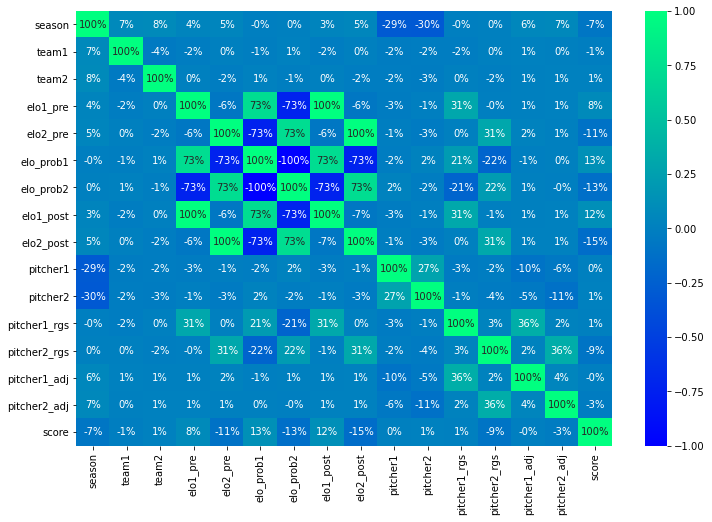

In [14]:
plt.figure(figsize=(12,8))
cor=df_2.corr()
sns.heatmap(cor,annot=True,fmt='.0%',cmap='winter')

In [15]:
df_3=df_2.drop(columns=['elo1_post','elo2_post','pitcher1_adj','pitcher1'])

In [16]:
df_3.skew()

season         -0.423830
team1           0.082350
team2           0.083154
elo1_pre       -0.185314
elo2_pre       -0.202166
elo_prob1      -0.063691
elo_prob2       0.063691
pitcher2       -0.040268
pitcher1_rgs    0.788086
pitcher2_rgs    0.783614
pitcher2_adj    2.042471
score           1.177424
dtype: float64

<AxesSubplot:xlabel='score', ylabel='Density'>

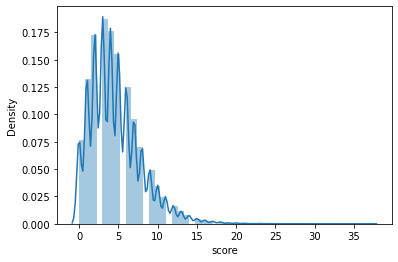

In [17]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(df['score'],kde=True)

In [18]:
#print(df[df['score'].between(0, 20)].shape[0], df.shape[0])

In [19]:
#df_4=df_3[df_3['score'].between(0, 20)]

In [21]:
df_3['score'] = pd.cut(df_3['score'], bins=[0,10,20,37],labels=[0,1,2],include_lowest= -1)

In [22]:
X=df_3.drop(columns=['score'])
y=df_3['score']

In [23]:
y.value_counts()

0    166224
1      9615
2       201
Name: score, dtype: int64

In [24]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X)
X_scaled=pd.DataFrame(sc.transform(X),index=X.index,columns=X.columns)

In [25]:
X_scaled.head()

,season,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,pitcher2,pitcher1_rgs,pitcher2_rgs,pitcher2_adj
0,0.794409,1.387436,2.030956,-0.703326,0.935761,-1.144336,1.144336,1.049910,-0.685520,-0.698739,-0.252999
1,-0.880523,0.259703,0.581103,0.618674,0.650121,-0.014204,0.014204,-0.528639,-0.461499,1.326805,-0.000130
2,-0.930521,-1.391621,-0.506286,-0.746665,0.209553,-0.663515,0.663515,1.573311,-0.398420,-0.485073,-0.060920
3,-1.280507,1.387436,-1.432581,-0.002994,-3.142172,2.089518,-2.089518,-0.975736,-0.762097,-1.303131,-0.423156
4,0.944403,1.588817,-0.667381,0.076303,0.636845,-0.386284,0.386284,1.664519,0.129832,-0.071241,-0.101812


In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled.values, i)
                          for i in range(len(X_scaled.columns))]

In [27]:
vif_data

,feature,VIF
0,season,1.130698
1,team1,1.008667
2,team2,1.009507
3,elo1_pre,415.174168
4,elo2_pre,413.558998
5,elo_prob1,inf
6,elo_prob2,inf
7,pitcher2,1.108185
8,pitcher1_rgs,1.113667
9,pitcher2_rgs,1.291250


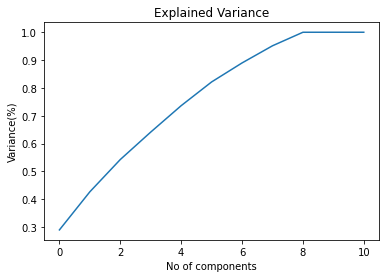

In [28]:
from sklearn.decomposition import PCA
pca=PCA()
principalComponents=pca.fit_transform(X_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No of components')
plt.ylabel('Variance(%)')
plt.title('Explained Variance')
plt.show()

In [29]:
X_final=X_scaled.drop(columns=['elo1_pre','elo_prob2'])

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X_final.columns
vif_data["VIF"] = [variance_inflation_factor(X_final.values, i)
                          for i in range(len(X_final.columns))]

In [31]:
vif_data

,feature,VIF
0,season,1.116890
1,team1,1.008627
2,team2,1.009369
3,elo2_pre,2.395494
4,elo_prob1,2.368575
5,pitcher2,1.107790
6,pitcher1_rgs,1.111867
7,pitcher2_rgs,1.290742
8,pitcher2_adj,1.180657


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

Class=0, n=166224 (33.239%)
Class=1, n=167724 (33.539%)
Class=2, n=166140 (33.222%)


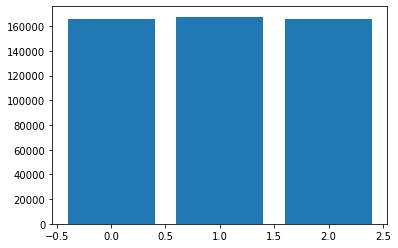

In [33]:
from imblearn.over_sampling import ADASYN
from collections import Counter
X_final, y = ADASYN().fit_resample(X_final, y)
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [34]:
x_train,x_test,y_train,y_test=train_test_split(X_final,y,random_state=42,test_size=0.20,shuffle=True)

In [35]:
models=[DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),GradientBoostingClassifier()]
for m in models:
  m.fit(x_train,y_train)
  score=m.score(x_train,y_train)
  print('model score for',m,'is:',score)
  y_pred=m.predict(x_test)
  clr=classification_report(y_test,y_pred)
  print('classification report for',m,'is:',clr)
  accuracy=accuracy_score(y_test,y_pred)
  print('Accuracy score for',m,'is:',accuracy)
  print('\n\n')

model score for DecisionTreeClassifier() is: 1.0
classification report for DecisionTreeClassifier() is:               precision    recall  f1-score   support

           0       0.92      0.90      0.91     33203
           1       0.90      0.92      0.91     33444
           2       0.99      1.00      0.99     33371

    accuracy                           0.94    100018
   macro avg       0.94      0.94      0.94    100018
weighted avg       0.94      0.94      0.94    100018

Accuracy score for DecisionTreeClassifier() is: 0.9378511867863785



model score for KNeighborsClassifier() is: 0.9356187667158248
classification report for KNeighborsClassifier() is:               precision    recall  f1-score   support

           0       1.00      0.73      0.84     33203
           1       0.80      1.00      0.88     33444
           2       0.99      1.00      0.99     33371

    accuracy                           0.91    100018
   macro avg       0.93      0.91      0.91    100018
weig

In [37]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

,Feature importance
season,0.210446
team1,0.124858
team2,0.121937
pitcher2_adj,0.099584
elo2_pre,0.097781
pitcher1_rgs,0.090034
elo_prob1,0.088071
pitcher2_rgs,0.087191
pitcher2,0.080099


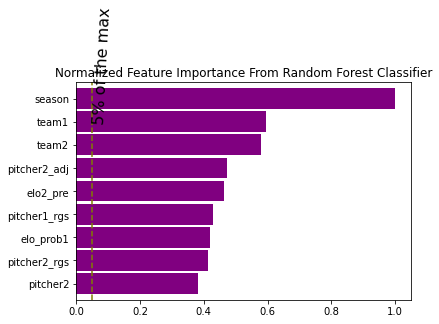

In [38]:
feature_labels = np.array((X_final.columns))
(pd.Series(rf.feature_importances_,index=feature_labels).sort_values(ascending=True)/np.max(rf.feature_importances_)).plot.barh(color='purple',width=0.9)
_ = plt.title('Normalized Feature Importance From Random Forest Classifier')
_ = plt.axvline(0.05,linestyle='--',color='olive')
_ = plt.text(0.05,7,'5% of the max',rotation=87,fontsize=16)
pd.DataFrame(rf.feature_importances_,index=feature_labels,columns=['Feature importance']).sort_values('Feature importance',ascending=False)

In [39]:
from sklearn import model_selection
seed=7
kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
results = model_selection.cross_val_score(rf, X_final, y, cv=kfold)
print('cross_val_score of',rf,'is :')
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

cross_val_score of RandomForestClassifier() is :
Accuracy: 98.209% (0.057%)


In [40]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization

In [41]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim = x_train.shape[1]))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 260       
Total params: 900
Trainable params: 900
Non-trainable params: 0
_________________________________________________________________


In [42]:
import tensorflow
lr_schedule=tensorflow.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1.0,
    decay_steps=100000,
    decay_rate=0.9)

In [46]:
model.compile(optimizer = tensorflow.keras.optimizers.RMSprop(learning_rate=lr_schedule),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [47]:
from keras.backend import clear_session
clear_session()

In [48]:
from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor = 'val_loss',min_delta = 0,patience = 3, verbose = 1,restore_best_weights = True)

In [49]:
history=model.fit(x_train, y_train, epochs=100, batch_size=32,validation_data=(x_test,y_test),callbacks=earlystop)

Epoch 1/100
12503/12503 [==============================] - 22s 2ms/step - loss: 1.4875 - accuracy: 0.3351 - val_loss: 1.4785 - val_accuracy: 0.3337
Epoch 2/100
12503/12503 [==============================] - 20s 2ms/step - loss: 1.2409 - accuracy: 0.3329 - val_loss: 1.4930 - val_accuracy: 0.3336
Epoch 3/100
12503/12503 [==============================] - 20s 2ms/step - loss: 1.2355 - accuracy: 0.3328 - val_loss: 2.3635 - val_accuracy: 0.3344
Epoch 4/100
12503/12503 [==============================] - 21s 2ms/step - loss: 1.2324 - accuracy: 0.3330 - val_loss: 1.5781 - val_accuracy: 0.3336
Restoring model weights from the end of the best epoch.
Epoch 00004: early stopping


In [50]:
import joblib
file='MLB2.pkl'
joblib.dump(rf,file)

['MLB2.pkl']

In [52]:
df_test=pd.read_csv('MLB_test.csv')
df_test.head(10)

,date,season,neutral,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,rating1_pre,rating2_pre,pitcher1,pitcher2,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post
0,8/7/1952,1952,0,CIN,STL,1467.967000,1541.99000,0.428504,0.571496,1466.074000,1543.883000,1467.288000,1546.209000,perkh101,brech101,48.207000,51.838000,-0.392851,0.252007,0.424383,0.575617,1465.466000,1548.032000
1,6/20/2001,2001,0,CHW,KCR,1502.209000,1472.19900,0.577107,0.422893,1503.308000,1471.100000,1503.393000,1476.329000,biddr001,wilsk001,47.049000,48.090000,0.203916,-0.247801,0.572962,0.427038,1504.573000,1475.149000
2,9/19/1965,1965,0,STL,LAD,1511.081000,1528.22300,0.509868,0.490132,1507.982000,1531.323000,1513.726000,1525.587000,gibsb101,ostec103,57.805000,50.792000,0.252007,-0.351777,0.517462,0.482538,1510.050000,1529.263000
3,5/1/1986,1986,0,ATL,NYM,1463.834000,1561.33700,0.395771,0.604229,1467.595000,1557.576000,1463.873000,1558.138000,smitz001,aguir001,52.251000,48.540000,-0.301919,-0.458553,0.400237,0.599763,1467.175000,1554.835000
4,9/1/1992,1992,0,NYM,ATL,1489.622000,1552.73600,0.443947,0.556053,1487.586000,1554.771000,1485.818000,1554.512000,whitw001,niedd001,47.088000,47.400000,-0.458553,-0.301919,0.436033,0.563967,1483.709000,1556.621000
5,9/6/2016,2016,0,PIT,STL,1505.338982,1527.44862,0.502720,0.497280,1503.465405,1529.322197,1501.767505,1523.745573,Ryan Vogelsong,Luke Weaver,47.380784,50.934364,-8.062191,0.139805,0.491107,0.508893,1499.948111,1525.564967
6,7/17/1971,1971,0,ANA,BAL,1477.958000,1586.89300,0.380147,0.619853,1482.819000,1582.032000,1478.237000,1586.531000,murpt101,palmj001,45.538000,56.221000,0.116756,-0.010332,0.381017,0.618983,1483.576000,1581.192000
7,5/1/2003,2003,0,TOR,TEX,1491.798000,1504.64400,0.516046,0.483954,1493.108000,1503.335000,1490.057000,1507.495000,Roy Halladay,Colby Lewis,54.559000,48.256000,30.521800,1.198500,0.551460,0.448540,1491.245000,1506.307000
8,7/21/1999,1999,0,HOU,ARI,1550.385000,1516.47400,0.582577,0.417423,1547.734000,1519.126000,1552.448000,1504.822000,elars001,reyna001,47.719000,50.912000,-1.538962,0.082351,0.606919,0.393081,1549.769000,1507.502000
9,9/21/1983,1983,0,TEX,OAK,1491.410000,1471.10700,0.563414,0.436586,1492.999000,1469.519000,1493.129000,1467.914000,smitm002,codic001,50.165000,48.156000,0.065851,0.334327,0.570356,0.429644,1494.799000,1466.244000


In [53]:
## dataset shape 

print(f"{'shape of the dataset'.title()} :- {df_test.shape}")

## missing values
print(f"\n {'Number of null values in every column'.title()} \n {df_test.isnull().sum()}")

## duplicate values
print(f"\n {'number of duplicate values'.title()} :- {len(df_test.loc[df_test.duplicated()])}")

## information about dataset
print(f"{'dataset info'.title()} \n ")
df_test.info()

Shape Of The Dataset :- (37056, 23)

 Number Of Null Values In Every Column 
 date            0
season          0
neutral         0
team1           0
team2           0
elo1_pre        0
elo2_pre        0
elo_prob1       0
elo_prob2       0
elo1_post       0
elo2_post       0
rating1_pre     0
rating2_pre     0
pitcher1        0
pitcher2        0
pitcher1_rgs    0
pitcher2_rgs    0
pitcher1_adj    0
pitcher2_adj    0
rating_prob1    0
rating_prob2    0
rating1_post    0
rating2_post    0
dtype: int64

 Number Of Duplicate Values :- 0
Dataset Info 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37056 entries, 0 to 37055
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          37056 non-null  object 
 1   season        37056 non-null  int64  
 2   neutral       37056 non-null  int64  
 3   team1         37056 non-null  object 
 4   team2         37056 non-null  object 
 5   elo1_pre      37056 non-null  

In [54]:
df_test.drop(columns=['date'],inplace=True,axis=1)

In [55]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df_test[['team1','team2','pitcher1','pitcher2']]:
    df_test[col]=le.fit_transform(df_test[col])

In [56]:
df_test.describe()

,season,neutral,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,rating1_pre,rating2_pre,pitcher1,pitcher2,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post
count,37056.000000,37056.000000,37056.000000,37056.000000,37056.000000,37056.000000,37056.000000,37056.000000,37056.000000,37056.000000,37056.000000,37056.000000,37056.00000,37056.000000,37056.000000,37056.000000,37056.000000,37056.000000,37056.000000,37056.000000,37056.000000,37056.000000
mean,1974.722555,0.000108,13.847879,13.742093,1504.692742,1504.253482,0.534479,0.465521,1504.632137,1504.314086,1504.692326,1504.262576,1866.05292,1861.918232,50.354499,50.316414,0.351395,0.343562,0.535171,0.464829,1504.628490,1504.326413
std,30.337331,0.010389,8.279025,8.288670,35.201243,35.079213,0.072245,0.072245,35.278305,35.189671,35.497660,35.368543,1071.63360,1071.659001,4.202650,4.183841,7.238113,7.334153,0.074149,0.074149,35.574236,35.475438
min,1913.000000,0.000000,0.000000,0.000000,1371.140000,1362.332000,0.271211,0.210795,1371.679000,1362.332000,1363.563000,1356.077000,0.00000,0.000000,36.927069,35.831507,-63.322607,-54.685929,0.257509,0.187742,1362.816000,1356.077000
25%,1951.000000,0.000000,6.000000,6.000000,1481.270000,1480.940500,0.486367,0.416083,1481.090000,1480.804750,1481.286250,1480.939750,940.00000,932.000000,47.400000,47.400000,-0.351777,-0.351777,0.485677,0.413926,1481.139500,1481.019013
50%,1979.000000,0.000000,14.000000,14.000000,1505.977000,1505.686500,0.535495,0.464505,1505.996000,1505.620500,1506.113000,1505.894000,1884.00000,1896.000000,49.774000,49.759000,-0.072218,-0.072218,0.536227,0.463773,1506.143500,1505.848500
75%,2001.000000,0.000000,21.000000,21.000000,1528.776250,1528.070250,0.583917,0.513633,1528.854250,1528.180250,1528.769750,1528.142250,2797.00000,2782.000000,52.798268,52.794000,0.203916,0.203916,0.586074,0.514323,1528.764250,1528.291500
max,2020.000000,1.000000,29.000000,29.000000,1628.325000,1624.874000,0.789205,0.728789,1628.325000,1626.435000,1633.602000,1629.303000,3715.00000,3711.000000,77.667000,76.316000,74.008882,77.545422,0.812258,0.742491,1633.602000,1631.597000


In [57]:
df_final_test=df_test.drop(columns=['rating1_pre','rating2_pre','rating_prob1','rating_prob2','rating1_post','rating2_post','neutral','elo1_post','elo2_post','pitcher1_adj','pitcher1','elo1_pre','elo_prob2'])

In [58]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_final_test)
df_test_scaled=pd.DataFrame(sc.transform(df_final_test),index=df_final_test.index,columns=df_final_test.columns)

In [59]:
df_test_scaled.head()

,season,team1,team2,elo2_pre,elo_prob1,pitcher2,pitcher1_rgs,pitcher2_rgs,pitcher2_adj
0,-0.749007,-0.827147,1.358247,1.075766,-1.466909,-0.895743,-0.510994,0.363686,-0.012484
1,0.866187,-0.947936,-0.089532,-0.913787,0.590047,1.637746,-0.786538,-0.532153,-0.080633
2,-0.320486,1.347051,0.031116,0.683306,-0.340669,0.766189,1.772834,0.113674,-0.094810
3,0.371740,-1.431091,0.393061,1.627297,-1.920007,-1.168222,0.451269,-0.424595,-0.109369
4,0.569519,0.380741,-1.416663,1.382105,-1.253153,0.699002,-0.777258,-0.697076,-0.088012


In [60]:
loadfile=joblib.load('MLB2.pkl')

In [61]:
predtest=loadfile.predict(df_test_scaled)

In [68]:
y_test= y_test.sample(frac = 1)

In [69]:
print(y_test.shape,predtest.shape)

(100018,) (37056,)


In [70]:
accuracy=accuracy_score(y_test[:37056],predtest)
print('Test Accuracy score is:',accuracy)
classification=classification_report(y_test[:37056],predtest)
print('Test classification report is:',classification)

Test Accuracy score is: 0.32736938687392053
Test classification report is:               precision    recall  f1-score   support

           0       0.32      0.31      0.32     12305
           1       0.33      0.64      0.44     12407
           2       0.31      0.02      0.05     12344

    accuracy                           0.33     37056
   macro avg       0.32      0.33      0.27     37056
weighted avg       0.32      0.33      0.27     37056



In [75]:
predtest=pd.DataFrame(predtest)
predtest.to_csv('MLBpred.csv')